In [1]:
from automate import *

In [17]:
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

In [18]:
with (open("data.pkl", "rb")) as openfile:
    data = pickle.load(openfile)

data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data = [np.stack(col.values) for _, col in data.items()]
#X_train = tf.constant(df["CDR3"].to_numpy())
#X_train_v_gene = tf.constant(df["v_gene"].to_numpy())
#X_train_j_gene = tf.constant(df["j_gene"].to_numpy())
X_train = data

Epoch 1/4
7386/7386 [==============================] - 13s 2ms/step - loss: 13.6762 0s - loss: 13.77 - ETA: 0s -
Epoch 2/4
7386/7386 [==============================] - 12s 2ms/step - loss: 9.9002
Epoch 3/4
7386/7386 [==============================] - 12s 2ms/step - loss: 9.4040: 2s
Epoch 4/4
7386/7386 [==============================] - 12s 2ms/step - loss: 9.2297


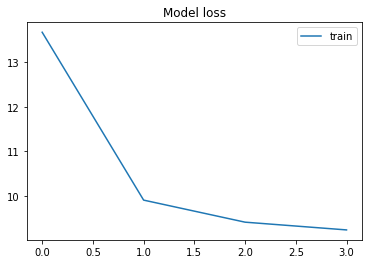

In [19]:
params = {  "n_inputs" : 20,
            "epochs": 4,
            "batch_size": 32,}
model_simple, encoder_simple = train_model_basic(df, X_train, params)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 40)          160         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                           

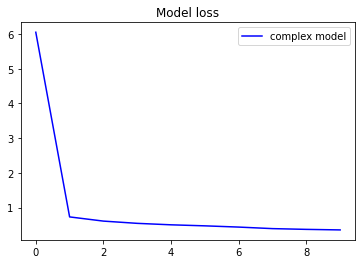

In [5]:
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.75,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 4,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }
model, encoder = train_model_complex(df, X_train, params=params)

In [20]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_55_524_ALRKVPTDNYITTY_KVPTDNYITTY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')

## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index('CASSLRTDHYEQYF')

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample = df[df["CDR3"].isin(group)]
print(len(sample))
print(sample["label"].unique())

26
850
[ 20 217]


In [21]:
f

,Unnamed: 0,cdr3_b_aa,v_b_gene,j_b_gene,pgen,radius,target_hits,bkgd_hits,bkgd_hits_weighted,bkgd_total,...,TR_re,BR_re_weighted,RR_re_weighted,OR_re_weighted,chi2re,chi2joint,neighbors,K_neighbors,nsubject,novel
0,297,CASSRKTDSYEQYF,TRBV28*01,TRBJ2-7*01,6.495401e-09,28,58,20,1.646719,198357,...,0.212425,0.000539,219.534955,500.531672,20704.245577,42772.614662,"[42, 45, 47, 49, 51, 52, 53, 54, 55, 57, 59, 6...",58,12,1
1,213,CASGIKTDSYEQYF,TRBV28*01,TRBJ2-7*01,4.529755e-11,34,51,8,0.658688,198357,...,0.200401,0.000370,281.722147,677.305531,22634.565332,42284.059926,"[40, 41, 42, 45, 47, 51, 52, 53, 54, 55, 57, 5...",51,11,1
2,256,CASSMRTDSYEQYF,TRBV28*01,TRBJ2-7*01,3.175954e-09,22,52,4,1.247008,198357,...,0.164329,0.000299,354.885738,656.842162,18621.881242,38453.928281,"[42, 49, 51, 52, 53, 54, 57, 58, 59, 60, 63, 6...",52,12,1
3,49,CASSFRSDSYEQYF,TRBV28*01,TRBJ2-7*01,1.434550e-08,22,43,9,1.658688,198357,...,0.150301,0.000125,707.891117,1419.893067,22101.007069,38220.099700,"[42, 49, 50, 51, 52, 54, 59, 63, 65, 128, 129,...",43,11,1
4,292,CASSHRTDSYEQYF,TRBV28*01,TRBJ2-7*01,2.001258e-08,22,42,2,1.082336,198357,...,0.142285,0.000097,887.147097,1707.654940,21866.674343,37792.006741,"[41, 42, 49, 51, 52, 57, 59, 63, 65, 128, 129,...",42,12,1
5,130,CASSLRTDSYEQYF,TRBV28*01,TRBJ2-7*01,8.285894e-08,20,50,6,1.411680,198357,...,0.158317,0.000260,392.959778,723.008328,18707.327832,37686.993349,"[51, 52, 53, 54, 55, 57, 58, 59, 60, 63, 65, 1...",50,11,1
6,61,CASSRKTDLYEQYF,TRBV28*01,TRBJ2-7*01,7.926863e-10,34,49,22,1.811391,198357,...,0.160321,0.000276,362.574509,690.690902,18582.757253,37024.557801,"[45, 47, 51, 52, 54, 55, 57, 58, 59, 61, 63, 6...",49,12,1
7,55,CASSLKTDQYEQYF,TRBV28*01,TRBJ2-7*01,4.099862e-10,28,37,10,1.741024,198357,...,0.146293,0.000090,849.350527,1911.077197,22996.486579,36714.211154,"[45, 47, 53, 54, 55, 57, 58, 59, 60, 61, 129, ...",37,11,1
8,218,CASSLKTDSYEQYF,TRBV28*01,TRBJ2-7*01,2.146322e-08,20,48,4,1.247008,198357,...,0.128257,0.000172,571.000124,855.375273,16300.381159,34545.827578,"[51, 52, 53, 54, 55, 57, 58, 59, 60, 63, 65, 1...",48,11,1
9,221,CASSLRTDNYEQYF,TRBV28*01,TRBJ2-7*01,6.225037e-09,22,41,6,1.411680,198357,...,0.158317,0.000260,323.613935,723.008328,18707.327832,34120.571417,"[51, 52, 53, 55, 57, 58, 59, 60, 63, 65, 128, ...",41,10,1


In [22]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_67_382_APHGVVFL_APHGVVFLHV_GVVFLHVTY_VVFLHVTYV.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')

## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index('CASSMGHGDTEAFF')

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample2 = df[df["CDR3"].isin(group)]
print(len(sample2))
print(sample2["label"].unique())

30
1856
[219  25  71]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

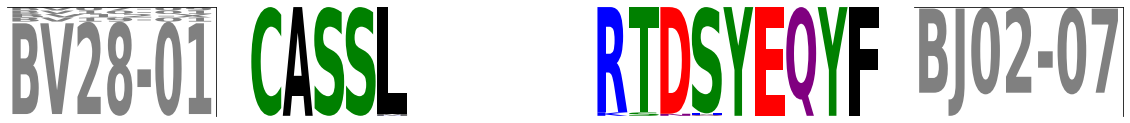

In [23]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

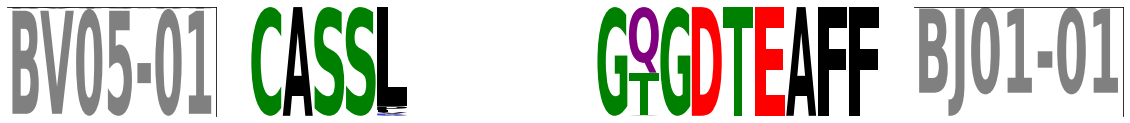

In [24]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample2, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

In [25]:
groups_index = list(sample.index) + list(sample2.index)
X_test = X_train.copy()
for i in range(len(X_test)):
    X_test[i] = X_test[i][groups_index]
print(X_test[0].shape)

(2706, 20)


In [26]:
df = pd.concat([sample, sample2])

In [27]:
X_test_encode = encoder.predict(X_test)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test_encode)
plot_X_test = principalComponents

  0%|          | 0/2706 [00:00<?, ?it/s]

2706
(2706, 20)


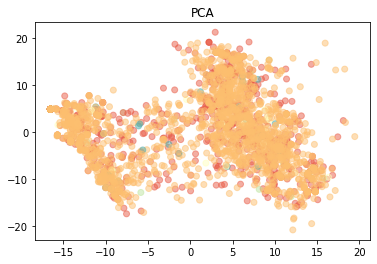

In [28]:
label = "label"
labels = []
labels_encoder = LabelEncoder()
labels_encoder = labels_encoder.fit(df[label].unique())
for k in tqdm(df.index):
    labels.append(labels_encoder.transform([df.loc[k,label]]))
labels = [int(y) for y in labels]
df[label] = labels
rgb_values = sns.color_palette("Spectral", df[label].nunique())
df[str(label+"_color")] = df[label].apply(lambda x: rgb_values[x])
print(len(X_test_encode))
print(X_test_encode.shape)
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=df["label_color"], alpha=0.5)
plt.title("PCA")
plt.show()

In [31]:
X_test_encode = encoder_simple.predict(X_test[0])
plot_X_test = X_test_encode

  0%|          | 0/2706 [00:00<?, ?it/s]

2706
(2706, 2)


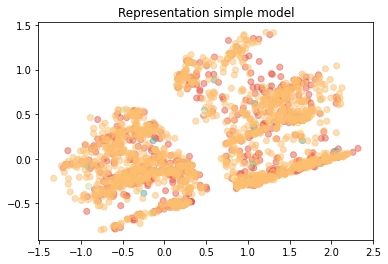

In [35]:
label = "label"
labels = []
labels_encoder = LabelEncoder()
labels_encoder = labels_encoder.fit(df[label].unique())
for k in tqdm(df.index):
    labels.append(labels_encoder.transform([df.loc[k,label]]))
labels = [int(y) for y in labels]
df[label] = labels
rgb_values = sns.color_palette("Spectral", df[label].nunique())
df[str(label+"_color")] = df[label].apply(lambda x: rgb_values[x])
print(len(X_test_encode))
print(X_test_encode.shape)
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=df["label_color"], alpha=0.5)
plt.title("Representation simple model")
plt.show()

In [33]:
labels_encoder.classes_

array([0, 1, 2, 3, 4], dtype=int64)